In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
#from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))


pandas : 1.0.5
numpy : 1.18.5
matplotlib : 3.2.2
seaborn : 0.10.1
sklearn : 0.24.2


In [4]:
features = ['frame.interface_id',
 'frame.dlt', 'frame.offset_shift',
 'frame.time_epoch', 'frame.time_delta',
 'frame.time_delta_displayed', 'frame.time_relative',
 'frame.len', 'frame.cap_len',
 'frame.marked', 'frame.ignored',
 'radiotap.version', 'radiotap.pad',
 'radiotap.length', 'radiotap.present.tsft',
 'radiotap.present.flags', 'radiotap.present.rate',
 'radiotap.present.channel', 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna', 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise', 'radiotap.present.rxflags',
 'radiotap.present.xchannel', 'radiotap.present.mcs',
 'radiotap.present.ampdu', 'radiotap.present.vht',
 'radiotap.present.reserved', 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime',
 'radiotap.flags.cfp', 'radiotap.flags.preamble',
 'radiotap.flags.wep', 'radiotap.flags.frag',
 'radiotap.flags.fcs', 'radiotap.flags.datapad',
 'radiotap.flags.badfcs', 'radiotap.flags.shortgi',
 'radiotap.datarate', 'radiotap.channel.freq',
 'radiotap.channel.type.turbo', 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm', 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half', 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal', 'radiotap.antenna',
 'radiotap.rxflags.badplcp', 'wlan.fc.type_subtype', 'wlan.fc.version',
 'wlan.fc.type', 'wlan.fc.subtype',
 'wlan.fc.ds', 'wlan.fc.frag',
 'wlan.fc.retry', 'wlan.fc.pwrmgt',
 'wlan.fc.moredata', 'wlan.fc.protected',
 'wlan.fc.order', 'wlan.duration',
 'wlan.ra', 'wlan.da', 'wlan.ta',
 'wlan.sa', 'wlan.bssid', 'wlan.frag', 'wlan.seq',
 'wlan.bar.type', 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo', 'wlan.ba.bm',
 'wlan.fcs_good', 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss', 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy', 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc', 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man', 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd', 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm', 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon', 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq', 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact', 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment', 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all', 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel', 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period', 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset', 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version', 'wlan_mgt.rsn.gcs.type', 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count', 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth', 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr', 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey', 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg', 'wlan.wep.iv',
 'wlan.wep.key', 'wlan.wep.icv',
 'wlan.tkip.extiv', 'wlan.ccmp.extiv',
 'wlan.qos.tid', 'wlan.qos.priority',
 'wlan.qos.eosp', 'wlan.qos.ack',
 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4', 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2', 'data.len',
 'class']

In [3]:
awidtst= pd.read_csv("AWID-CLS-R-Tst",header=None,names=features)

In [5]:
awidtst.replace({"?":None}, inplace=True)
null_column=awidtst.columns[awidtst.isnull().mean() >= 0.51]

In [6]:
awidtst.drop(null_column, axis=1, inplace=True)
awidtst.dropna(inplace=True)

In [7]:
for col in awidtst.columns:
    awidtst[col]=pd.to_numeric(awidtst[col], errors='ignore')
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
for col in awidtst.columns:
    if awidtst[col].dtypes=='object':
        awidtst[col] = labelencoder.fit_transform(awidtst[col])

In [8]:
x=awidtst.iloc[:,:-1]
y=awidtst.iloc[:,-1]
from sklearn.model_selection import train_test_split
x,x_test,y,y_test = train_test_split(x, y, test_size=0.7, random_state=1) 

In [9]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(x_test,y_test)

# Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_test,y_test)


#LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_test,y_test)






LogisticRegression(n_jobs=-1, random_state=0)

In [10]:
from sklearn import metrics
A=DTC_Classifier.predict(x_test)
import sklearn.metrics as metrics

accuracy_d= metrics.accuracy_score(y_test, DTC_Classifier.predict(x_test))
dtc_pred=DTC_Classifier.predict(x_test)
confusion_matrix_d= metrics.confusion_matrix(y_test, DTC_Classifier.predict(x_test))
classification_d= metrics.classification_report(y_test,DTC_Classifier.predict(x_test))

In [11]:
B=BNB_Classifier.predict(x_test)
import sklearn.metrics as metrics
accuracy_n= metrics.accuracy_score(y_test,BNB_Classifier.predict(x_test))
nbb_pred=BNB_Classifier.predict(x_test)
confusion_matrix_n= metrics.confusion_matrix(y_test, BNB_Classifier.predict(x_test))
classification_n= metrics.classification_report(y_test, BNB_Classifier.predict(x_test))

In [12]:
L=LGR_Classifier.predict(x_test)
import sklearn.metrics as metrics
accuracy_L= metrics.accuracy_score(y_test,LGR_Classifier.predict(x_test))
lgr_pred=LGR_Classifier.predict(x_test)
confusion_matrix_L= metrics.confusion_matrix(y_test,LGR_Classifier.predict(x_test))
classification_L= metrics.classification_report(y_test,LGR_Classifier.predict(x_test))

# Accuracy and Confusion Matrix

In [13]:
print('DT Accuracy:',accuracy_d)
print('DT confustion_matrix')
print(confusion_matrix_d)
print("--------------------------------------------------------")
print('Navie Bayes Accuracy:',accuracy_n)
print('NBB confustion_matrix')
print(confusion_matrix_n)
print("--------------------------------------------------------")
print('LNR Accuracy:',accuracy_L)
print('confustion_matrix')
print(confusion_matrix_L)
print("--------------------------------------------------------")


DT Accuracy: 1.0
DT confustion_matrix
[[ 12923      0      0]
 [     0  11642      0]
 [     0      0 194709]]
--------------------------------------------------------
Navie Bayes Accuracy: 0.9825469503908352
NBB confustion_matrix
[[ 12923      0      0]
 [    97  11530     15]
 [   253   3462 190994]]
--------------------------------------------------------
LNR Accuracy: 0.8879712140974306
confustion_matrix
[[     0      0  12923]
 [     0      0  11642]
 [     0      0 194709]]
--------------------------------------------------------


# Classification report

In [14]:
print('Decision Tree:')
print('Classification report')
print(classification_d)
print("--------------------------------------------------------")
print('Navie Bayes Accuracy:')
print('Classification report')
print(classification_n)
print("--------------------------------------------------------")
print('LNR Accuracy:')
print('Classification report')
print(classification_L)
print("--------------------------------------------------------")


Decision Tree:
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12923
           1       1.00      1.00      1.00     11642
           2       1.00      1.00      1.00    194709

    accuracy                           1.00    219274
   macro avg       1.00      1.00      1.00    219274
weighted avg       1.00      1.00      1.00    219274

--------------------------------------------------------
Navie Bayes Accuracy:
Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     12923
           1       0.77      0.99      0.87     11642
           2       1.00      0.98      0.99    194709

    accuracy                           0.98    219274
   macro avg       0.91      0.99      0.95    219274
weighted avg       0.99      0.98      0.98    219274

--------------------------------------------------------
LNR Accuracy:
Classification report
       

# Error rate

In [15]:
from sklearn.metrics import mean_squared_error
print("Error rate of models")
print("--------------------------------------------------------")
print("DT Error rate")
a=mean_squared_error(y_test,dtc_pred)
print(a)
print("--------------------------------------------------------")
print("NBB Error rate")
b=mean_squared_error(y_test,nbb_pred)
print(b)
print("--------------------------------------------------------")
print("LGR Error rate")
c=mean_squared_error(y_test,lgr_pred)
print(c)
print("--------------------------------------------------------")


Error rate of models
--------------------------------------------------------
DT Error rate
0.0
--------------------------------------------------------
NBB Error rate
0.020914472304057935
--------------------------------------------------------
LGR Error rate
0.28883497359468063
--------------------------------------------------------


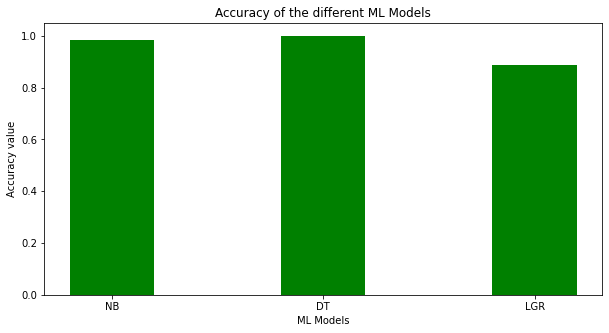

In [16]:
data = {'NB':accuracy_n,'DT':accuracy_d,'LGR':accuracy_L}
import numpy as np
import matplotlib.pyplot as plt
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)
 
plt.xlabel("ML Models")
plt.ylabel("Accuracy value")
plt.title("Accuracy of the different ML Models")
plt.show()